In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("happiness_score_dataset.csv")    # Or we can also paste raw file link inside " "
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Data Preparation

In [3]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [5]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
df.drop(['Country','Region','Happiness Rank','Standard Error','Dystopia Residual'],axis=1,inplace = True)
df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Economy (GDP per Capita)       158 non-null    float64
 2   Family                         158 non-null    float64
 3   Health (Life Expectancy)       158 non-null    float64
 4   Freedom                        158 non-null    float64
 5   Trust (Government Corruption)  158 non-null    float64
 6   Generosity                     158 non-null    float64
dtypes: float64(7)
memory usage: 8.8 KB


In [9]:
df.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


# Data Cleaning

In [10]:
df.corr()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Score,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319
Economy (GDP per Capita),0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465
Family,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513
Health (Life Expectancy),0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335
Freedom,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916
Trust (Government Corruption),0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123
Generosity,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000


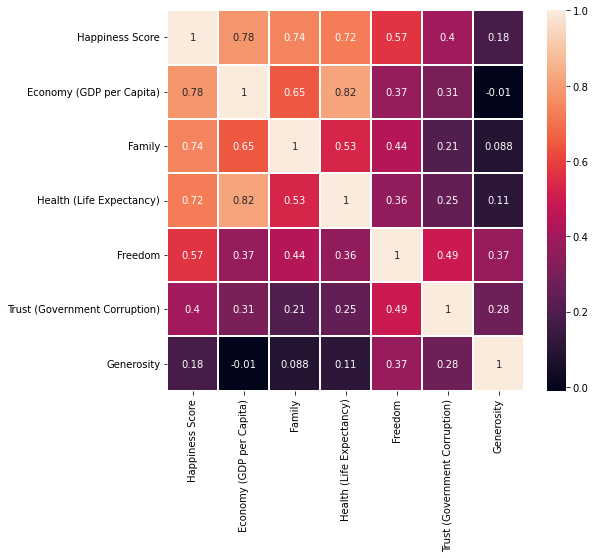

In [11]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(),annot=True,linewidths = 2)
plt.show()

Considering Correlation threshold +/-0.1. We can see from above that all factors are showing some positive correlation with the target(Happiness Score)

# Outliers

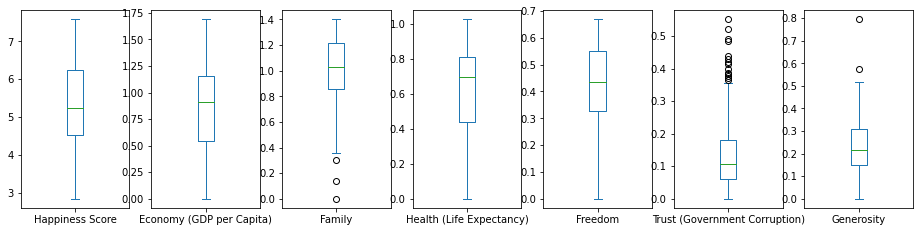

In [12]:
# Boxplots

df.plot(kind='box',subplots=True,layout=(2,7),figsize=(16,8)) 
plt.show()

Removing Outliers using Z-score -  As we can see from the boxplot that outliers are present in Columns - Family,Trust & Generosity

In [13]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.937360,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040
1,1.914581,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856
2,1.884792,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293
3,1.880411,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638
4,1.797179,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563
...,...,...,...,...,...,...,...
153,1.674055,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228
154,1.783571,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117
155,2.076199,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891
156,2.164688,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950


In [14]:
# Now to take out the ouliers lets define a threshold i.e 3 here
# All values with Z-score >3 will be considered as ouliers
# Making a new file for values with z-score<3

threshold=3
df_new=df[(z<3).all(axis=1)]
df_new

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
151,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747
152,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179


In [15]:
df.shape

(158, 7)

In [16]:
df_new.shape       # Now the ouliers have been removed

(153, 7)

# Exploratory Data Analysis & Visualization

Univariate Analysis

In [17]:
df_new.skew()

Happiness Score                  0.133600
Economy (GDP per Capita)        -0.392269
Family                          -0.803145
Health (Life Expectancy)        -0.741582
Freedom                         -0.397454
Trust (Government Corruption)    1.280533
Generosity                       0.636850
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


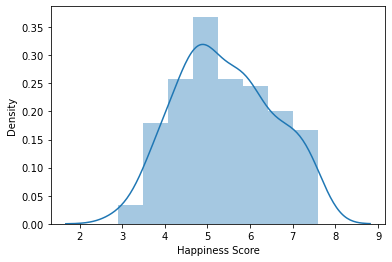

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


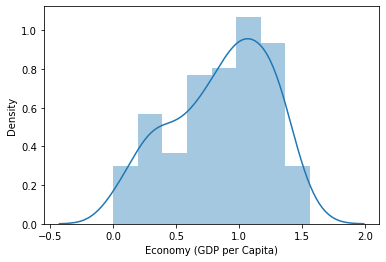

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


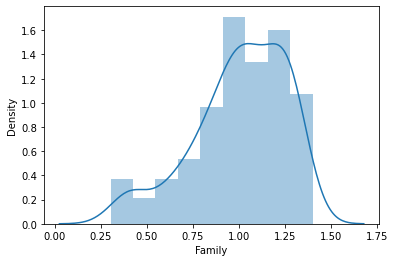

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


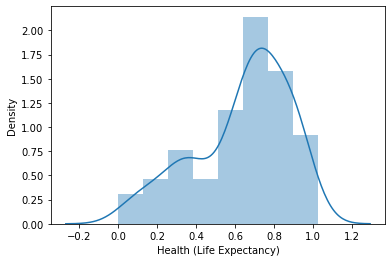

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


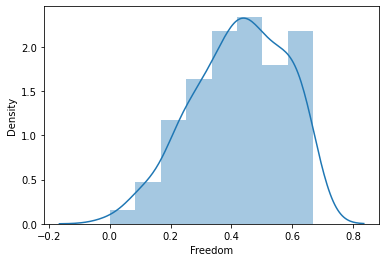

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


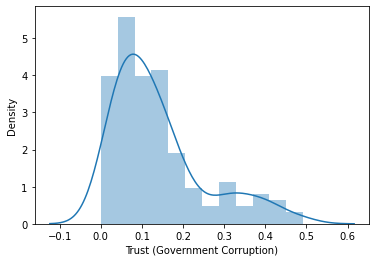

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


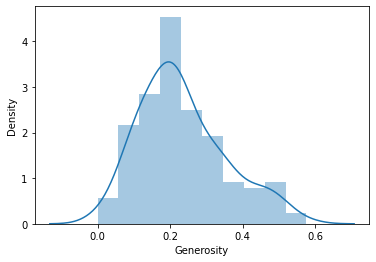

In [18]:
# Taking Skewness threshold as +/- 0.20
# We can see that columns other than Happiness Score are skewed
# Confirming the same using distribution plots

for i in df_new.columns:
    plt.figure()
    sns.distplot(df_new[i])
    plt.show()

From above distribution plots we can confirm that the following columns are skewed :

1. Economy (GDP per Capita)       
2. Family                        
3. Health (Life Expectancy)     
4. Freedom                   
5. Trust (Government Corruption) 
6. Generosity    

Bivarate Analysis

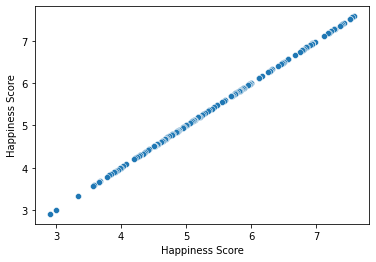

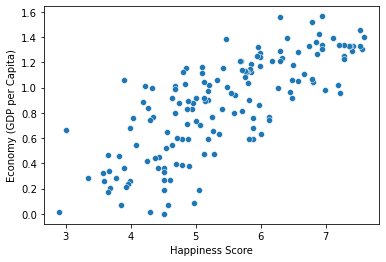

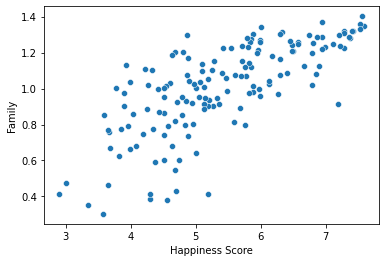

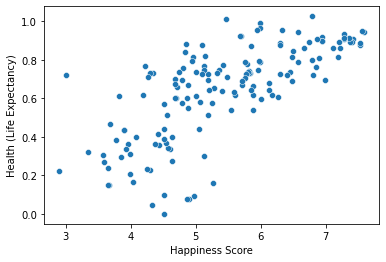

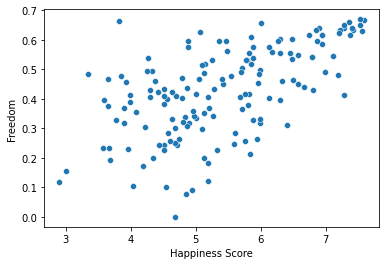

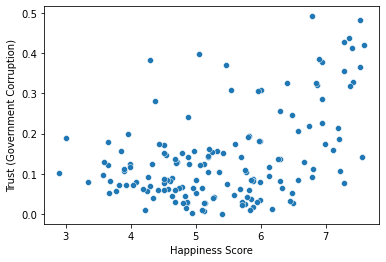

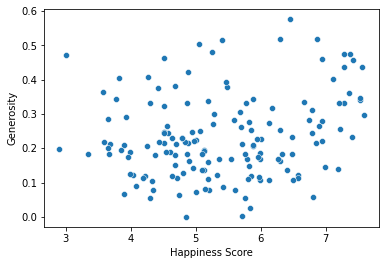

In [19]:
for i in df_new.columns:
    sns.scatterplot(x='Happiness Score',y=i,data=df_new)
    plt.show()

From above scatter plots we can see that 'Economy (GDP per Capita)' , 'Family' , 'Health (Life Expectancy)', 'Freedom' show strong relationship whith the Happiness Score

Whereas Factors such as 'Trust (Government Corruption) ' & 'Generosity' have a weak releationship with the Happiness Score 

In [20]:
#Dividing the data into Independent columns & Target column

x = df_new.iloc[:,1:]  # Independent Columns

y = pd.DataFrame(df_new.iloc[:,0])  # Target Column

Removing Skewnees using Power Transformation for removing skewnees from the data

In [21]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=True)

In [22]:
data = pt.fit_transform(x)
x = pd.DataFrame(data,columns=x.columns)

In [23]:
x.skew()                # Now we can see that the skewness is removed & all values are in range +/-0.2

Economy (GDP per Capita)        -0.140789
Family                          -0.153197
Health (Life Expectancy)        -0.183728
Freedom                         -0.079238
Trust (Government Corruption)    0.175466
Generosity                       0.024284
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


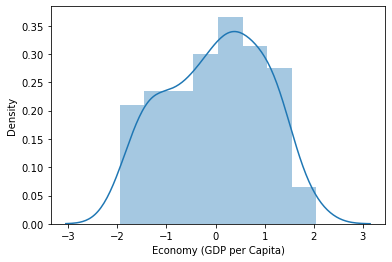

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


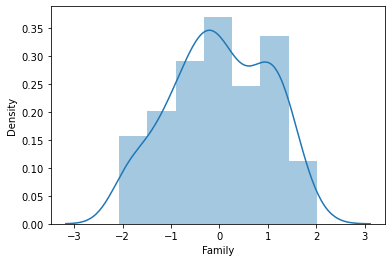

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


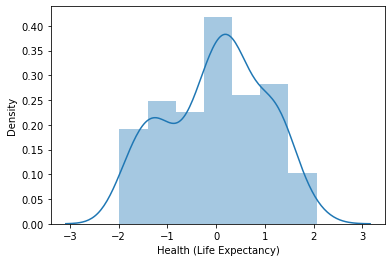

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


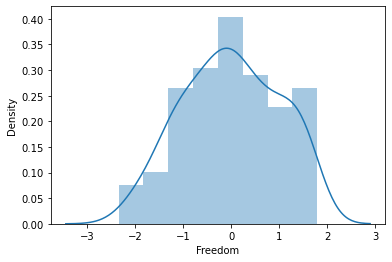

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


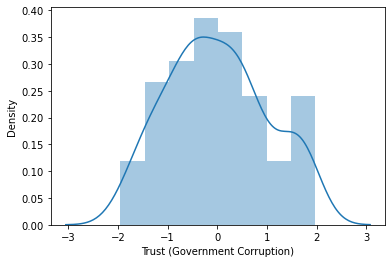

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


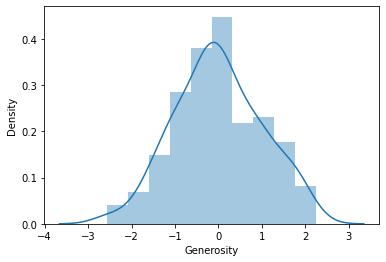

In [24]:
for i in x.columns:
    plt.figure()
    sns.distplot(x[i])
    plt.show()

# Splitting the DataFrame

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression            # To work with regression model
lm = LinearRegression()

In [26]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=0.22)
    lm.fit(x_train,y_train)
    if lm.score(x_train,y_train)*100 > 82.0:
        print("At random state",i,"The model preforms very well")
        print("At random state :-",i, "Model Accuracy score is :-",lm.score(x_train,y_train)*100,'\n')

At random state 40 The model preforms very well
At random state :- 40 Model Accuracy score is :- 82.29340232846465 

At random state 79 The model preforms very well
At random state :- 79 Model Accuracy score is :- 82.2780144191927 

At random state 92 The model preforms very well
At random state :- 92 Model Accuracy score is :- 82.23320781203373 

At random state 112 The model preforms very well
At random state :- 112 Model Accuracy score is :- 83.37991997451162 

At random state 221 The model preforms very well
At random state :- 221 Model Accuracy score is :- 82.69453090562916 

At random state 271 The model preforms very well
At random state :- 271 Model Accuracy score is :- 82.31626961741974 

At random state 384 The model preforms very well
At random state :- 384 Model Accuracy score is :- 82.60256977435486 

At random state 396 The model preforms very well
At random state :- 396 Model Accuracy score is :- 82.30183752487625 

At random state 496 The model preforms very well
At ran

From Above we can see that the model is performing best at Random state 112 as the Accuracy score is heighest at 112. Therefore using random_state = 112 for training the model.

In [27]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=112,test_size=0.22)

In [28]:
x_train.shape

(119, 6)

In [29]:
x_test.shape

(34, 6)

In [30]:
y_train.shape

(119, 1)

In [31]:
y_test.shape

(34, 1)

In [32]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error         # To find out error in the equation
import warnings
warnings.filterwarnings('ignore')

Testing Various Models i.e.:-
   1. Linear Regression
   2. L1 - Lasso Regression
   3. L2 - Ridge Regression
   4. ElasticNet

To check which one performs best

In [33]:
lm = LinearRegression()
ls  = Lasso(alpha=0.0001)
rd = Ridge(alpha=0.0001)
enr = ElasticNet (alpha=0.0001)

models=[lm,ls,rd,enr]

for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print("Accuracy Score of",i,'is:-',i.score(x_train,y_train))
    print('Mean squared error :', mean_squared_error(y_test,pred))
    print('\n')

Accuracy Score of LinearRegression() is:- 0.8337991997451162
Mean squared error : 0.5008995317894296


Accuracy Score of Lasso(alpha=0.0001) is:- 0.8337991637583015
Mean squared error : 0.5007451070089413


Accuracy Score of Ridge(alpha=0.0001) is:- 0.8337991997449566
Mean squared error : 0.5008992468130058


Accuracy Score of ElasticNet(alpha=0.0001) is:- 0.833799187411638
Mean squared error : 0.500805600610308




From above we can see that the Mean Squared Error in case of Lasso Regression is Minimum.

Hence, here Lasso Regression model is working best for the Data

In [34]:
ls  = Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))

lspred = ls.predict(x_test)
print(mean_squared_error(y_test,lspred))

0.8337991637583015
0.5007451070089413


# Saving the Model

In [37]:
import pickle

filename = 'World_Happiness_Report.pkl'

pickle.dump(enr, open(filename,'wb'))  # 'wb' write binary mode - Use to save model